# Installation
pip install geomagnetism

# Method
## Geomagnetic field computation

As the terrestrial magnetic field obeys both $\nabla {\bf{B}} = 0$ and $\nabla  \times {\bf{B}} = 0$, it can be shown that the magnetic field can be expressed as the gradient of a scalar potential $V$ which satisfies the Laplace equation:

\begin{equation*}
\Delta V = 0\
\end{equation*}

<br>For a spherical geometry the geomagnetic potential is given by the spherical harmonic expension (SH) [1,2,3]:
$$
V(r,\theta ,\phi ,t) = a\sum\limits_{n = 1}^N {{{\left( {\frac{a}{r}} \right)}^{n + 1}}} \sum\limits_{m = 0}^n {\left[ {g_n^m(t)\cos (m\phi ) + h_n^m(t)\sin (m\phi )} \right]P_n^m\left( {\cos (\theta )} \right)} 
$$

with:
$$
\begin{array}{l}
P_n^0\left( x \right) = \frac{1}{{{2^n}n!}}\frac{{{d^n}}}{{d{x^n}}}{\left( {{x^2} - 1} \right)^n}\\
\\
P_n^m\left( x \right) = \frac{1}{{{2^n}n!}}\frac{{{d^n}}}{{d{x^n}}}{\left( {{x^2} - 1} \right)^n}:m > 0
\end{array}
$$

<br>$g_n^m$ and $h_n^m$ are the Gauss's coefficients. Note that the sum over $n$ begins with the the value $n=1$ as the index $n=0$ would correspond to a monopole.The dipole, quadrupole, octupole,... contribution correspond to $n=1,2,3,...$ These coefficients varies with time and are tabulated ( https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html ). $a$ is the mean radius of the earth (6371 km); $r$, $\theta $, $\phi $ are the geocentric spherical coordinates (radius,geocentric colatitude and longitude). We note that the  Condon-Shortley phase correction ${( - 1)^m}$ is omitted in the definition of the associated Legendre polynomial and the polynomes are normalized using Schmidt quasi-normalization [4]. The relation ${\bf{B}} =  - \nabla V$ leads to:

$$
{B_x} =  - {B_\theta } = \frac{1}{r}\frac{{\partial V}}{{\partial \theta }} = \sum\limits_{n = 1}^N {{{\left( {\frac{a}{r}} \right)}^{n + 2}}\sum\limits_{m = 0}^n {\left[ {g_n^m\cos (m\phi ) + h_n^m\sin (m\phi )} \right]\frac{{dP_n^m(\cos \theta )}}{{d\theta }}} } 
$$

$$
{B_y} = {B_\phi } = \frac{{ - 1}}{{r\sin \theta }}\frac{{\partial V}}{{\partial \phi }} = \sum\limits_{n = 1}^N {{{\left( {\frac{a}{r}} \right)}^{n + 2}}\sum\limits_{m = 0}^n {m\left[ {g_n^m\sin (m\phi ) - h_n^m\cos (m\phi )} \right]\frac{{P_n^m(\cos \theta )}}{{\sin \theta }}} } 
$$

$$
{B_z} =  - {B_r} = \frac{{\partial V}}{{\partial r}} = \sum\limits_{n = 1}^N {(n + 1){{\left( {\frac{a}{r}} \right)}^{n + 2}}\sum\limits_{m = 0}^n {\left[ {g_n^m\cos (m\phi ) + h_n^m\sin (m\phi )} \right]P_n^m(\cos \theta )} }
$$

<br>where ${B_x},{B_y},{B_z}$ are the field components respectively in the northward, eastward and downward directions.<br>

## geodetic to geocentric transformation
The SH decomposition is done in a  geocentric coordinates and as we usually deal with geodetic coordinates we have to transform the geodetic latitude $\Phi$ and radius $R$ into the geocentric latitude $\Phi '$ and radius $R'$ defined in Fig. 1. The transformation formula relating $(R,\Phi )$ to $(R',\Phi ')$ can be found in [8] and are recalled in Fig.1.<br> The magnetic vector ${\bf{B}}$ undergoes the following transformation :

$$
{\left( {\begin{array}{*{20}{c}}
{{B_x}}\\
{{B_y}}\\
{{B_z}}
\end{array}} \right)_{{\rm{geodetic}}}} = \left[ {\begin{array}{*{20}{c}}
{\cos \delta }&0&{ - \sin \delta }\\
0&1&0\\
{\sin \delta }&0&{\cos \delta }
\end{array}} \right]{\left( {\begin{array}{*{20}{c}}
{{B_x}}\\
{{B_y}}\\
{{B_z}}
\end{array}} \right)_{{\rm{geocentric}}}}
$$

<br> with $\delta  = \theta ' - \theta  = \Phi  - \Phi '$.<br>
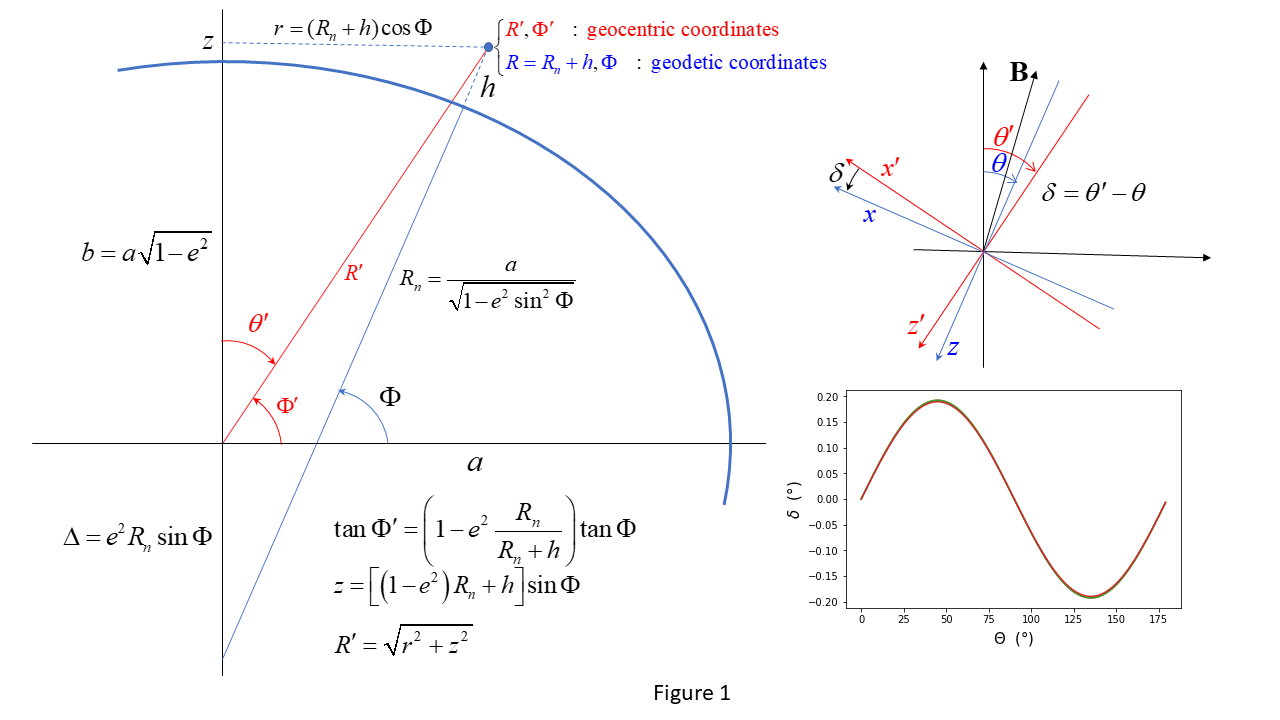

## Programmes
- An in line calculator [5] permits the computation of the magnetic declination.<br> 
- a FORTRAN code available can be downloaded from [9]. Qote: "This code is is a synthesis routine for the 13th generation IGRF as agreed in December 2019 by IAGA Working Group V-MOD. It is valid 1900.0 to 2025.0 inclusive. Values for dates from 1945.0 to 2015.0 inclusive are definitive, otherwise they are non-definitive. Reference radius remains as 6371.2 km - it is NOT the mean  radius (= 6371.0 km) but 6371.2 km is what is used in determining the coefficients.'
- a C code available along with the Geomag 7.0 software (Windows version) [9]
- a PYTHON code [7]

## Bibliography

- [1] Campbell, Wallace H. Introduction to Geomagnetic Fields Cambridge University Press 2007
- [2] Kono, M. Geomagnetim: An Introduction and Overview Elsevier 2015
- [3] Stacey F. D., Davis P. M. Physics of the earth Cambridge University Press
- [4] Winch D. E. et al. Geomagnetism and Schmidt quasi-normalization Geophys. J. Int. 160 p. 487-454 2005
- [5] https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml
- [6] https://www.gsj.jp/data/openfile/no0423/index.html
- [7] https://pypi.org/project/geomag/#files
- [8] http://clynchg3c.com/Technote/geodesy/coordcvt.pdf
- [9] https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html
- [10] Peddie, Norman W. International Geomagnetic Reference Field : the third generation J. Geomag. Geolectr 34 p. 309-326


In [1]:
import geomagnetism as geo
from random import sample, randint

Date = dict(zip(["mode","year","month","day","hour","minute","second"],
               ["ymd",randint(1900,2020),randint(1,12),randint(1,28),0,0,0 ]))
height = 500 # altitude (m)
colatitude = 10 # colatitude (°)
longitude = 0 # longitude (°)


Bx,By,Bz,D,F,H,I = geo.B_components(longitude,colatitude,height,Date,referential="geodetic")

d = geo.decdeg2dms(D)
i = geo.decdeg2dms(I)
print(f"Declination : {d[0]}° {d[1]}' {d[2]:0.2f}''")
print(f"Inclination : {i[0]}° {i[1]}' {i[2]:0.2f}''")
print(f"North component : {Bx:0.3f} nT")
print(f"East component : {By:0.3f} nT")
print(f"Down component : {Bz:0.3f} nT")
print(f"Horizontal field strength : {H:0.3f} nT")
print(f"Total field strength : {F:0.3f} nT")

Declination : -15.0° 26.0' 56.06''
Inclination : 82.0° 45.0' 6.27''
North component : 6781.962 nT
East component : -1874.293 nT
Down component : 53323.533 nT
Horizontal field strength : 7036.191 nT
Total field strength : 53785.752 nT


#  h and g coefficients
One critical issue of the geomagnetic field determination is the experimental value of the coefficients $h_n^m$, $g_n^m$ versus year as well as their secular variation.
We provide 4 parsers to read 4 differents data files.


In [2]:
file = "IGRF13.COF" # downloaded from https://www.ngdc.noaa.gov/IAGA/vmod/coeffs/igrf13coeffs.txt
dic_dic_h, dic_dic_g, dic_dic_SV_h, dic_dic_SV_g, dic_N, Years= geo.read_IGRF13_COF(file)

In [3]:
file="FORTRAN_1900_1995.txt" # extracted from https://www.ngdc.noaa.gov/IAGA/vmod/igrf13.f
dic_dic_h,dic_dic_g,dic_N,Years = geo.read_fortran_DATA(file)  

In [4]:
file="IGRF13coeffs.txt" # downloaded from https://www.ngdc.noaa.gov/IAGA/vmod/igrf.html
dic_dic_h,dic_dic_g,dic_dic_SV_h,dic_dic_SV_g,dic_N,Years=geo.read_IGRF13coeffs(file)

In [5]:
y = "2020" #downloaded from https://www.ngdc.noaa.gov/geomag/WMM/wmm_ddownload.shtml
if y=="2015" or y=="2020":
    file="WMM_"+y+".COF"
    dic_dic_h1,dic_dic_g1,dic_dic_SV_h1,dic_dic_SV_g1,dic_N1,Years1=geo.read_WMM(file)

# Geodetic to geocentric transformation relationship
We can express $(R',\theta ')$ using the equation given by Peddie [1]:
<br>
$$
{R'^2} = {h^2} + 2h\sqrt {{a^2} - ({a^2} - {b^2}){{\sin }^2}\Phi }  + \frac{{{a^4} - ({a^4} - {b^4}){{\sin }^2}\Phi }}{{({a^2} - {b^2}){{\sin }^2}\Phi }}
$$
<br>
or by the following equations :
<br>
$$
{R'^2} = {\left( {a + h\sqrt {1 - {e^2}{{\sin }^2}\Phi } } \right)^2}\frac{{{{\cos }^2}\Phi }}{{1 - {e^2}{{\sin }^2}\Phi }} + {z^2}
$$
<br>
$$
\tan \Phi ' = \left( {1 - {e^2}\frac{{{R_n}}}{{{R_n} + h}}} \right)\tan \Phi
$$
<br>
where  $e = \sqrt {1 - \frac{{{b^2}}}{{{a^2}}}} $ is the eccentricity. $\theta$ and $\theta '$ are respectively  the geodetic and geocentric colatitudes, $h$ is the height above the geoid.
- [1] Peddie, Norman W. International Geomagnetic Reference Field : the third generation J. Geomag. Geolectr 34 p. 309-326

In [6]:
import geomagnetism as geo
import numpy as np
import pandas as pd
from random import randint

GRS80_ = geo.geomagnetism.GRS80_ 
WGS84_ = geo.geomagnetism.WGS84_
GRS80 = geo.geomagnetism.GRS80
WGS84 = geo.geomagnetism.WGS84

dic={}
for i, lat  in enumerate([randint(0,180) for _ in range(10)]):
    h = randint(0,6000)
    r_geocentric,co_latitude_geocentric,delta=geo.geodetic_to_geocentric(WGS84, lat,  h)
    r,ct,st,cd,sd=geo.geodetic_to_geocentric_IGRF13(WGS84_, lat, h*1.e-3)
    dic[i]=[lat,h,r_geocentric,r*1.e3,
            np.cos(co_latitude_geocentric),ct,
            np.sin(co_latitude_geocentric),st,
            np.cos(delta),cd,
            np.sin(delta),sd]
df=pd.DataFrame.from_dict(dic, orient='index',\
        columns=['lat', 'h', 'r', 'r_f',"cos(colat)",'ct',"sin(colat)",'st',"cos(delta)",'cd',"sin(delta)",'sd'])
print(df)

   lat     h             r           r_f  cos(colat)        ct  sin(colat)  \
0   51  5050  6.374761e+06  6.374761e+06    0.626768  0.626768    0.779206   
1   73  5315  6.381638e+06  6.381638e+06    0.290582  0.290582    0.956850   
2   53  5683  6.376116e+06  6.376116e+06    0.599238  0.599238    0.800571   
3   16  1929  6.360319e+06  6.360319e+06    0.960768  0.960768    0.277352   
4  110  5590  6.381244e+06  6.381244e+06   -0.339998 -0.339998    0.940426   
5  128  4979  6.375053e+06  6.375053e+06   -0.613094 -0.613094    0.790010   
6  107  5056  6.381379e+06  6.381379e+06   -0.290582 -0.290582    0.956850   
7   61  3140  6.376283e+06  6.376283e+06    0.482322  0.482322    0.875994   
8    3  4153  6.360964e+06  6.360964e+06    0.998611  0.998611    0.052687   
9   49  2844  6.371821e+06  6.371821e+06    0.653548  0.653548    0.756885   

         st  cos(delta)        cd  sin(delta)        sd  
0  0.779206    0.999995  0.999995    0.003280  0.003280  
1  0.956850    0.999998  

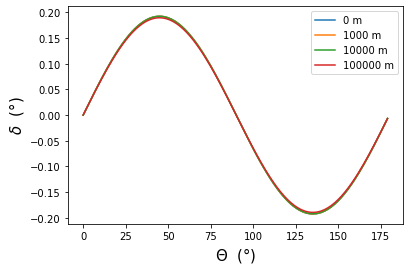

In [7]:
import geomagnetism as geo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ellipsoid parameters: semi major axis in metres, reciprocal flattening.
GRS80 = geo.geomagnetism.GRS80
WGS84 = geo.geomagnetism.WGS84

hs = [0,1000,10000,100000]
colats=np.arange(0,180,1)

for h in hs:
    colat_geocentrics=[]
    for colat in colats:
        _,colat_geocentric,_ = geo.geodetic_to_geocentric(WGS84, colat, h )
        colat_geocentrics.append(colat_geocentric)
        
    plt.plot(colats,np.array(colat_geocentrics)*180/np.pi-colats,label=str(h)+" m")
    plt.xlabel('$\Theta$  (°)',size=15)
    plt.ylabel('$\delta$  (°)',size=15)
    plt.legend()

# Check the Schmidt quasi-normalization conditions:
If we define:
\begin{equation*}
\begin{array}{*{20}{l}}
{C_n^m(\theta ,\phi ) \equiv P_n^m\left( {\cos \theta } \right)\cos m\theta \quad :m = 0,1,2 \cdots n}\\
{S_n^m(\theta ,\phi ) \equiv P_n^m\left( {\cos \theta } \right)\sin m\theta \quad :m = 1,2 \cdots n}
\end{array}\quad \quad \left( 1 \right)
\end{equation*}

the Schmidt quasi-normalization conditions reads [1] :
\begin{equation*}
\begin{array}{*{20}{l}}
{\frac{1}{{4\pi }}\int\limits_0^{2\pi } {\int\limits_0^\pi  {C_n^m(\theta ,\phi )C_N^M(\theta ,\phi )} } \sin \theta d\theta d\phi  = \frac{1}{{2n + 1}}\delta _n^N\delta _m^M}\\
{\frac{1}{{4\pi }}\int\limits_0^{2\pi } {\int\limits_0^\pi  {S_n^m(\theta ,\phi )S_N^M(\theta ,\phi )} } \sin \theta d\theta d\phi  = \frac{1}{{2n + 1}}\delta _n^N\delta _m^M\quad \quad \quad \quad (2)}\\
{\frac{1}{{4\pi }}\int\limits_0^{2\pi } {\int\limits_0^\pi  {C_n^m(\theta ,\phi )S_N^M(\theta ,\phi )} } \sin \theta d\theta d\phi  = 0\quad :\forall n,N,m,M}
\end{array}
\end{equation*}

The associated Legendre polynomial value are generated by the scipy function M,Mp=lpmn(M,N,x) where:
\begin{equation*}
P_n^m = \left[ {\begin{array}{*{20}{c}}
{P_0^0}&{P_1^0}& \cdots &{P_N^0}\\
0&{P_1^1}& \cdots &{P_N^1}\\
 \vdots & \vdots & \ddots & \vdots \\
0&0& \cdots &{P_N^M}
\end{array}} \right],\quad M[m,n] = P_n^m
\end{equation*}

with : 
\begin{equation*}
P_n^m\left( x \right) = \frac{{{{( - 1)}^m}}}{{{2^n}n!}}\sqrt {{{\left( {1 - {x^2}} \right)}^m}} \frac{{{d^{n + m}}}}{{d{x^n}}}{\left( {{x^2} - 1} \right)^n}
\end{equation*}

To normalize we use:
\begin{equation*}
M \leftarrow M \odot Norm\_Schmidt
\end{equation*}

where $ \odot $ is the component-wise multiplication and :
\begin{equation*}
P_n^m = {( - 1)^m}\sqrt {\frac{{\left( {2 - \delta _m^0} \right)(n - m)!}}{{(n + m)!}}} \quad :n - \left| m \right| \ge 0
\end{equation*}

\begin{equation*}
P_n^m = 0\quad : 0> n - \left| m \right|
\end{equation*}

Note that other authors in geophysics use different normalization factors. Stacey use [2]:
\begin{equation*}
P_n^m = {( - 1)^m}\sqrt {\left( {2 - \delta _m^0} \right)\left( {2m + 1} \right)\frac{{(n - m)!}}{{(n + m)!}}} \quad :n  \ge \left| m \right|
\end{equation*}
     
\begin{equation*}
P_n^m = 0\quad :\left| m \right|>n  
\end{equation*}

- [1] Winch D. E. et al. Geomagnetism and Schmidt quasi-normalization Geophys. J. Int. 160 p. 487-454 2005
- [2] Stacey F. D., Davis P. M. Physics of the earth Cambridge University Press

In [8]:
'''Checks the orthogonality and normalization relations (2) of the associated Legendre polynomes 
using eithe the Schmidt normalization (3) or the Stacey normalization (4)'''
from scipy.integrate import dblquad
import numpy as np
import math
from scipy.special import lpmn

mode="Schimdt" # must be equal to "Stacey" or "Schimdt"
n=9           # stands for N
m=8            # stands for M
n_=9          # stands for n
m_=8           # stands for m

def CC(theta,phi):
    M,_=lpmn(m,n,np.cos(theta))
    M=M*Norm
    t1=M[m,n]*np.cos(m*phi)
    t2=M[m_,n_]*np.cos(m_*phi)
    return t1*t2*np.sin(theta)

def SS(theta,phi):
    M,_=lpmn(m,n,np.cos(theta))
    M=M*Norm
    t1=M[m,n]*np.sin(m*phi)
    t2=M[m_,n_]*np.sin(m_*phi)
    return t1*t2*np.sin(theta)

def CS(theta,phi):
    M,_=lpmn(m,n,np.cos(theta))
    M=M*Norm
    t1=M[m,n]*np.cos(m*phi)
    t2=M[m_,n_]*np.sin(m_*phi)
    return t1*t2*np.sin(theta)


if mode=="Stacey":
    Norm=geo.Norm_Stacey(m,n) 
elif mode=="Schimdt":
    Norm=geo.Norm_Schimdt(m,n)

ans1, err = dblquad(CC, 0, 2*np.pi,
                   lambda x: 0,
                   lambda x: np.pi)
ans2, err = dblquad(SS, 0, 2*np.pi,
                   lambda x: 0,
                   lambda x: np.pi)
ans3, err = dblquad(CS, 0, 2*np.pi,
                   lambda x: 0,
                   lambda x: np.pi)
print("mode :",mode,"N =",n," M =",m, "n =", n_ ,"m =",m_)
if mode=="Stacey":
    print("\nNumerical value CC  : ",ans1,"\nTheoritical value CC:",4*np.pi*(n==n_)*(m_==m))
    print("\nNumerical value SS  : ",ans2,"\nTheoritical value SS:",4*np.pi*(n==n_)*(m_==m)*(1-(m_==0)))
    print("\nNumerical value SC  : ",ans3, "\nTheoritical value SC:",0)
elif mode=="Schimdt":
    print("\nNumerical value CC  : ",ans1, "\nTheoritical value CC:",4*np.pi/(2*n+1)*(n==n_)*(m_==m))
    print("\nNumerical value SS  : ",ans2,"\nTheoritical value SS:",4*np.pi/(2*n+1)*(n==n_)*(m_==m)*(1-(m_==0)))
    print("\nNumerical value SC  : ",ans3, "\nTheoritical value SC:",0)

mode : Schimdt N = 9  M = 8 n = 9 m = 8

Numerical value CC  :  0.6613879270715354 
Theoritical value CC: 0.6613879270715354

Numerical value SS  :  0.6613879270715353 
Theoritical value SS: 0.6613879270715354

Numerical value SC  :  -2.9971125723710876e-16 
Theoritical value SC: 0


<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>